installs

In [ ]:
#installs
%pip install qiskit[visualization]
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-aer
!pip install --upgrade qiskit
!pip install Aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e37bd05ec4f02121c8946594356b777fbb218a7a5d5758116d5b9128d3e4971f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

imports

In [ ]:
# imports
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator, Aer
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import transpile

code

Hi! Imagine you're a data scientist.
###### This program lets you create a quantum-randomized model of a mixed population to study genetic variation.
Simply enter a few details when prompted:

1. **Allele Types**: Enter two allele types separated by a space (e.g., `A G`).

2. **Population Details**: For each group in your study, enter:
   - **Name** (e.g., `Africans`)
   - **Allele Probability** for the first allele (0 to 1)
   - **Mix Ratio** (fraction of total population, 0 to 1; should sum to 1 across all groups)

3. **Population Size**: Specify the number of individuals to simulate.

#### Example:
- Allele Types: `A G`
- Population 1: `Africans` with `0.7` probability for allele A and mix ratio `0.6`
- Population 2: `Americans` with `0.3` probability for allele A and mix ratio `0.4`
- Population Size: `100`

Ready? Let’s explore quantum-driven genetics!

In [ ]:
# Function to prompt the user for input on allele types and population parameters
def get_population_parameters():
    # Get allele types (e.g., "A G" for alleles 'A' and 'G')
    allele_types = input("Enter the types of alleles to randomize between (e.g., 'A G'): ").split()

    # Dictionary to store information for each population
    populations = {}

    # Loop to input parameters for each population until the user types 'done'
    while True:
        pop_name = input("Enter an ethnicity name (or type 'done' to finish): ")
        if pop_name.lower() == 'done':  # Exit loop if 'done' is entered
            break

        # Get the probability of the first allele type for the current population
        allele_freq = float(input(f"Enter the probability of allele '{allele_types[0]}' for {pop_name} (0 to 1): "))

        # Get the mix ratio for this population in the total population mix
        mix_ratio = float(input(f"Enter the population mix ratio for {pop_name} (0 to 1): "))

        # Store the allele frequency and mix ratio in the dictionary for this population
        populations[pop_name] = {'allele_freq': allele_freq, 'mix_ratio': mix_ratio}

    return allele_types, populations  # Return allele types and population data


# Set up a quantum circuit with one qubit and one classical bit for generating randomness
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
qc.h(0)  # Apply Hadamard gate to put the qubit in superposition
qc.measure(0, 0)  # Measure the qubit and store the result in the classical bit


# Initialize the quantum simulator
simulator = AerSimulator()

# Compile the circuit to prepare it for the simulator
compiled_circuit = transpile(qc, simulator)


# Function to generate a single allele based on a population's allele frequency using quantum randomness
def generate_allele_quantum(allele_probability, allele_types):
    # Run the quantum circuit once to get a random bit ('0' or '1')
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()
    random_bit = list(counts.keys())[0]  # Extract the random bit from the result

    # Run the quantum circuit 10 times to approximate probability for allele decision
    job_probability = simulator.run(compiled_circuit, shots=10)
    result_probability = job_probability.result()
    counts_probability = result_probability.get_counts()

    # Calculate the probability based on the fraction of '0' outcomes in the 10 shots
    probability_count = counts_probability.get('0', 0) / 10  # Ratio of '0's in 10 trials

    # Decide which allele to assign based on the random bit and calculated probability
    if random_bit == '0':
        # If the random bit is '0', return the first allele type if probability condition is met
        return allele_types[0] if probability_count < allele_probability else allele_types[1]
    else:
        # If the random bit is '1', return the second allele type if probability condition is met
        return allele_types[1] if probability_count < allele_probability else allele_types[0]


# Main function to generate data for a mixed population
def generate_population_data(population_size, allele_types, populations):
    # Extract the mix ratios for each population into a dictionary
    population_mix = {k: v['mix_ratio'] for k, v in populations.items()}

    # List to store data for each individual in the mixed population
    mixed_population_data = []

    for _ in range(population_size):  # Loop for each individual
        # Randomly assign the individual to a population based on mix ratios
        population = np.random.choice(list(population_mix.keys()), p=list(population_mix.values()))

        # Get the allele frequency for the selected population
        allele_prob = populations[population]['allele_freq']

        # Generate two alleles for this individual using the quantum randomness function
        allele_1 = generate_allele_quantum(allele_prob, allele_types)
        allele_2 = generate_allele_quantum(allele_prob, allele_types)

        # Append the individual's population and alleles to the mixed population data
        mixed_population_data.append((population, allele_1, allele_2))

    return mixed_population_data  # Return the generated data


# Get the allele types and population parameters from user input
allele_types, populations = get_population_parameters()

# Prompt the user to enter the total population size to simulate
population_size = int(input("Enter the number of individuals to simulate: "))

# Generate the mixed population data using the input parameters
mixed_population_data = generate_population_data(population_size, allele_types, populations)

# Display the generated data for inspection
print("Sample Mixed Population Data (Population, Allele 1, Allele 2):")
print(mixed_population_data[:population_size])  # Print the individuals

Enter the types of alleles to randomize between (e.g., 'A G'): A G
Enter a population name (or type 'done' to finish): British
Enter the probability of allele 'A' for British (0 to 1): 0.6
Enter the population mix ratio for British (0 to 1): 0.6
Enter a population name (or type 'done' to finish): Middle Eastern
Enter the probability of allele 'A' for Middle Eastern (0 to 1): 0.4
Enter the population mix ratio for Middle Eastern (0 to 1): 0.3
Enter a population name (or type 'done' to finish): South asian
Enter the probability of allele 'A' for South asian (0 to 1): 0.2
Enter the population mix ratio for South asian (0 to 1): 0.1
Enter a population name (or type 'done' to finish): done
Enter the number of individuals to simulate: 20
Sample Mixed Population Data (Population, Allele 1, Allele 2):
[('British', 'A', 'A'), ('South asian', 'A', 'G'), ('British', 'A', 'G'), ('British', 'G', 'G'), ('Middle Eastern', 'A', 'G'), ('Middle Eastern', 'A', 'A'), ('British', 'A', 'A'), ('British', 'A'

plot our model on a histogram

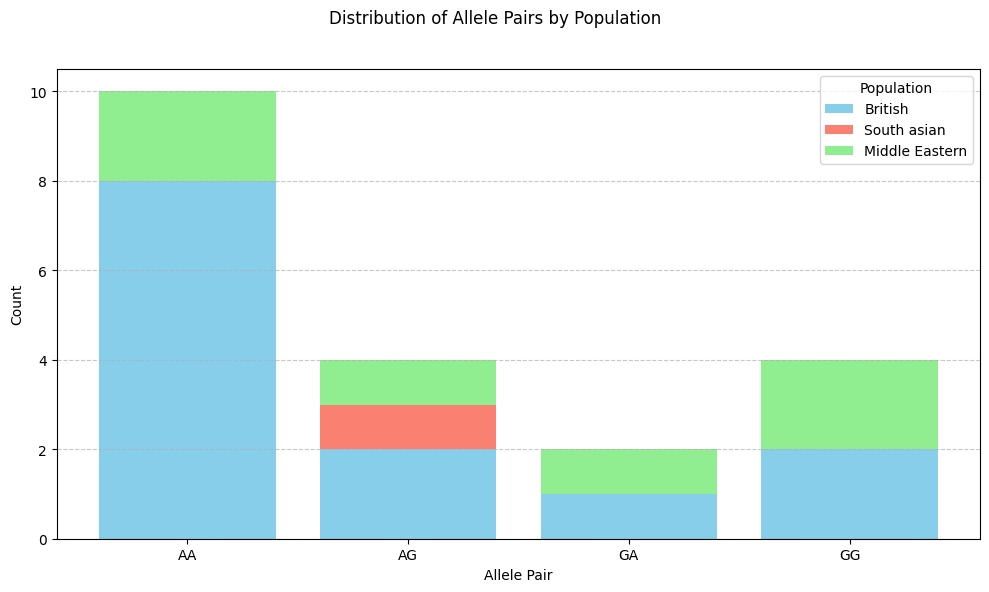

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Initialize a dictionary to store allele counts by population
population_allele_data = {}

# Process each entry in the mixed_population_data
for pop, allele1, allele2 in mixed_population_data:
    # Create an ordered allele pair (order matters, so 'AC' is different from 'CA')
    allele_pair = allele1 + allele2

    # Initialize a Counter for the population if not already present
    if pop not in population_allele_data:
        population_allele_data[pop] = Counter()

    # Increment the count for this allele pair in the current population
    population_allele_data[pop][allele_pair] += 1

# Find all unique allele pairs across all populations
all_allele_pairs = sorted(set(pair for counter in population_allele_data.values() for pair in counter))

# Define colors for each population
colors = ['skyblue', 'salmon', 'lightgreen']
populations = list(population_allele_data.keys())

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Distribution of Allele Pairs by Population")  # Title for the plot

# Initialize a baseline (y-position) for each allele pair
baseline = np.zeros(len(all_allele_pairs))

# Plot each population's data as stacked bars
for i, population in enumerate(populations):
    # Get counts for the current population, with zero for missing pairs
    counts = [population_allele_data[population].get(pair, 0) for pair in all_allele_pairs]

    # Plot bars for the current population, stacked on top of previous bars
    ax.bar(all_allele_pairs, counts, bottom=baseline, label=population, color=colors[i])

    # Update the baseline to stack the next population's bars on top
    baseline += np.array(counts)

# Customize axes and add labels
ax.set_xlabel("Allele Pair")  # Label for x-axis
ax.set_ylabel("Count")  # Label for y-axis

# Add legend and grid for readability
ax.legend(title="Population")
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Gridlines for easier reading

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()